In [8]:
import pandas as pd
import matplotlib.pyplot as plt # For visualization
from sklearn.cluster import DBSCAN # DBSCAN clustering algorithm
from sklearn.preprocessing import StandardScaler # Feature scaling


In [9]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
X=df[['Annual Income (k$)', 'Spending Score (1-100)']]

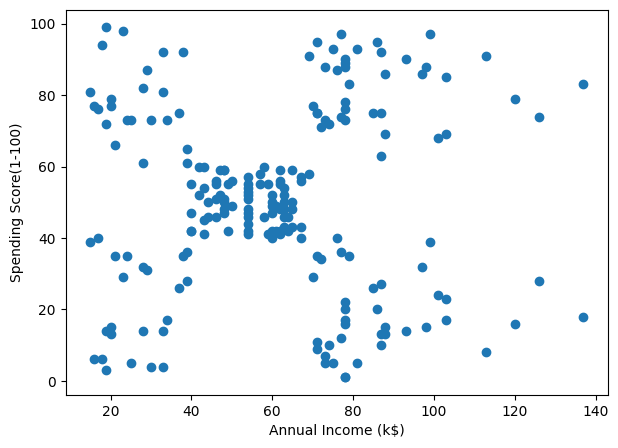

In [12]:
plt.figure(figsize=(7,5))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

In [13]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [14]:
dbscan=DBSCAN(eps=0.3,min_samples=5)
clusters=dbscan.fit_predict(X_scaled)

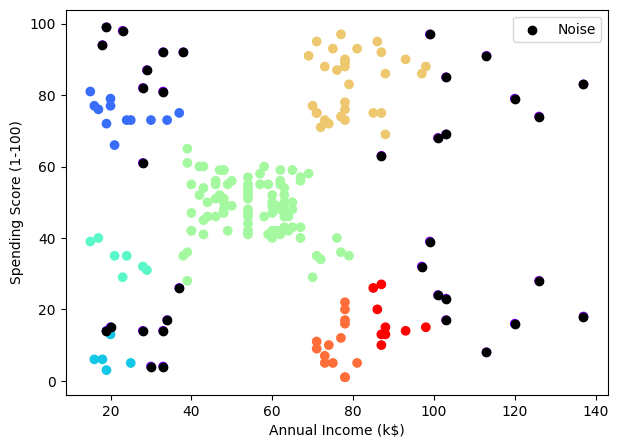

In [16]:
plt.figure(figsize=(7,5))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=clusters,cmap='rainbow')

plt.scatter(X.iloc[clusters==-1]['Annual Income (k$)'],X.iloc[clusters==-1]['Spending Score (1-100)'], color='black', label='Noise')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X,clusters)
print('silhouette score for DBSCAN',score)

silhouette score for DBSCAN 0.31595469080938154


In [23]:
from sklearn.metrics import silhouette_score
eps_value=[0.2,0.3,0.5]

for eps in eps_value:
    print(f"\nEvaluting DBSCAN using eps={eps}")

    # Apply DBSCAN
    dbscan=DBSCAN(eps=eps,min_samples=5)
    labels=dbscan.fit_predict(X_scaled)

    #Number of Clusters(Ignore Noise label -1)|
    unique_labels=set(labels)
    n_clusters=len(unique_labels)-(1 if -1 in unique_labels else 0)
    #Number of Noise Points
    n_noise=list(labels).count(-1)
    noise_ratio=n_noise/len(labels)
    print(f"Number of Clusters: {n_clusters }")
    print(f"Number of Noise Points:", round(noise_ratio,2))

    #Silhouette score (only if valid)
    if n_clusters>1:
        X_non_noise=X_scaled[labels!=-1]
        labels_non_noise=labels[labels!=-1]
        score=silhouette_score(X_non_noise, labels_non_noise)
        print("Silhoutte score:", round(score, 3))
    else:
        print("Silhouette score: Not applicable" )


Evaluting DBSCAN using eps=0.2
Number of Clusters: 7
Number of Noise Points: 0.39
Silhoutte score: 0.586

Evaluting DBSCAN using eps=0.3
Number of Clusters: 7
Number of Noise Points: 0.17
Silhoutte score: 0.524

Evaluting DBSCAN using eps=0.5
Number of Clusters: 2
Number of Noise Points: 0.04
Silhoutte score: 0.388
